In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Median value of owner-occupied homes

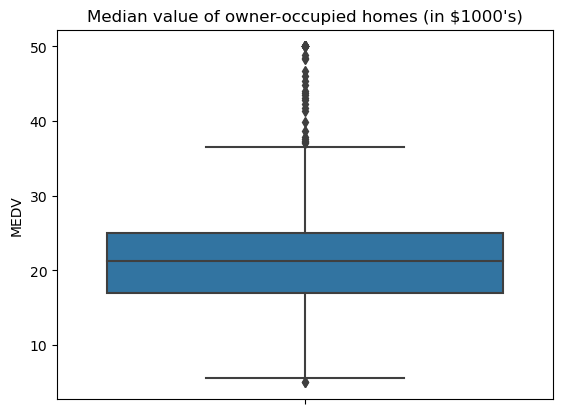

In [4]:
sns.boxplot(y = 'MEDV', data = boston_df)
plt.title('Median value of owner-occupied homes (in $1000\'s)')
plt.show()

In [5]:
print('First quartile:', boston_df['MEDV'].quantile(0.25))
print('Median:', boston_df['MEDV'].median())
print('Third quartile:', boston_df['MEDV'].quantile(0.75))

First quartile: 17.025
Median: 21.2
Third quartile: 25.0


# Charles River

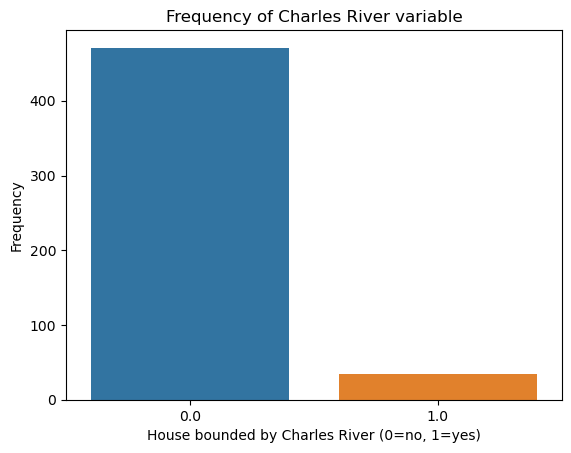

In [8]:
sns.countplot(x = 'CHAS', data = boston_df)
plt.title('Frequency of Charles River variable')
plt.xlabel('House bounded by Charles River (0=no, 1=yes)')
plt.ylabel('Frequency')
plt.show()

# MEDV vs AGE

In [9]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

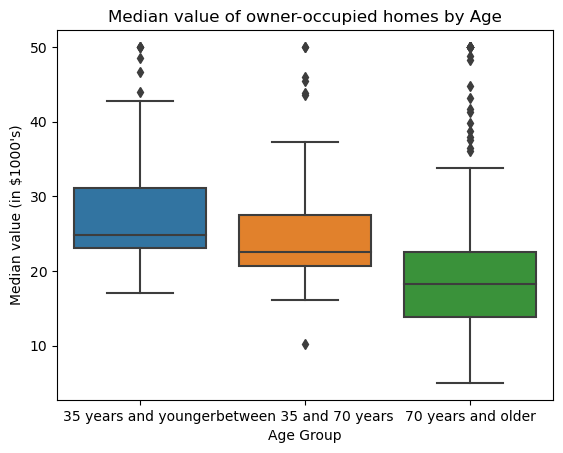

In [10]:
sns.boxplot(x = 'AGE_GROUP', y = 'MEDV', data = boston_df, order = ['35 years and younger', 'between 35 and 70 years', '70 years and older'])
plt.title('Median value of owner-occupied homes by Age')
plt.xlabel('Age Group')
plt.ylabel('Median value (in $1000\'s)')
plt.show()

Older homes have a lower value.

# Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

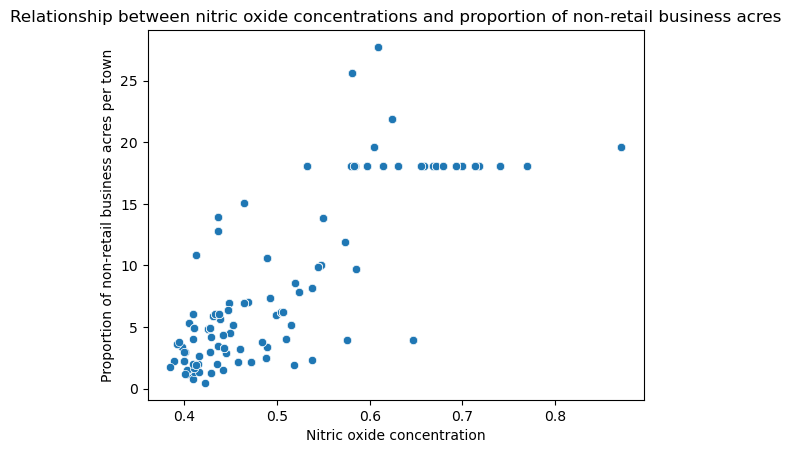

In [11]:
sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
plt.xlabel('Nitric oxide concentration')
plt.ylabel('Proportion of non-retail business acres per town')
plt.title('Relationship between nitric oxide concentrations and proportion of non-retail business acres')
plt.show()

There seems to be a positive correlation between nitric oxide concentration and the proportion of non-retail business acres per town.

# Pupil to teacher ratio

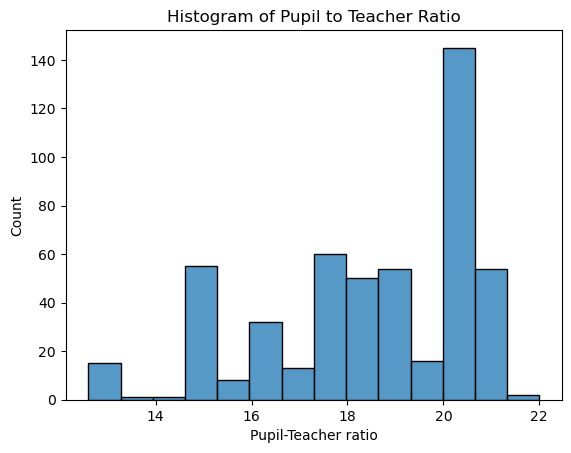

In [12]:
sns.histplot(x = 'PTRATIO', data = boston_df)
plt.title('Histogram of Pupil to Teacher Ratio')
plt.ylabel('Count')
plt.xlabel('Pupil-Teacher ratio')
plt.show()

# Is there a significant difference in median value of houses bounded by the Charles river or not?

**Hypothesis:**

*   $H\_0:$ there is no difference in median value of houses bounded by the Charles river or not 
*   $H\_1:$ there is a difference in median value of houses bounded by the Charles river or not

In [13]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:**
The p-value is lower than 0.05 so we reject the null hypothesis as there is enough proof that there is a statistical difference in median value houses bounded by the Charles River or not.

# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

**Hypothesis:**

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

In [14]:
thirtyfive_lower = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

In [15]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:**
Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 

**Hypothesis:**

*   $H\_0:$ Nitric oxide concentration is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentration is correlated with proportion of non-retail business acres per town


In [16]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061239593e-98)

**Conclusion:**
As the p-value is less than 0.05, we reject the null hypothesis and conclude that there exists a relationship between nitric oxide concentrations and proportion of non-retail business acres per town.

# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

**Hypothesis:**
*   $H\_0: β1$ = 0 (Weighted distance to the five Boston employment centres has no effect on the median value of owner occupied homes)
*   $H\_1: β1$ is not equal to 0 (Weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes)

In [17]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 05 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        09:35:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:**
The p-value is less than 0.05, so we reject the null hypothesis as there is evidence that the weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes.
<p>The coefficient 1.0916 means that an additional weighted distance to the five Boston employment centres has an impact of 1.0916 on the median value of owner occupied homes.